In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
from DiceTowerVision import *

file_template = "Images\\Templates\\template-dDR# (FV#).jpg"

In [2]:

dieset = DieSet.create_common_die_set_from_images(file_template,ranks=[6,8,10,12,20])
roll_template = "Images\\Rolls\\roll-d6d8d10d12d20 (R#).jpg"

In [ ]:

roll=12
dienum = 8
facenum = 6

die = dieset.dies[str(dienum)]
roll_file = roll_template.replace("R#",str(roll))
image_roll_RGB = cv.rotate(cv.cvtColor(cv.imread(roll_file),cv.COLOR_BGR2RGB),cv.ROTATE_90_CLOCKWISE)
point, confidence = die.get_best_point_from_image(image_roll_RGB, log_level=LOG_LEVEL_INFO)
sample = die.get_sample_at_point_from_image(image_roll_RGB,point,log_level=LOG_LEVEL_INFO)
sample.view_keypoints()
die.faces[str(facenum)].samples[0].view_keypoints()
face, score = die.get_best_face_match_from_sample(sample,log_level=LOG_LEVEL_VERBOSE)

Images\Rolls\roll-d6d8d10d12d20 (1).jpg


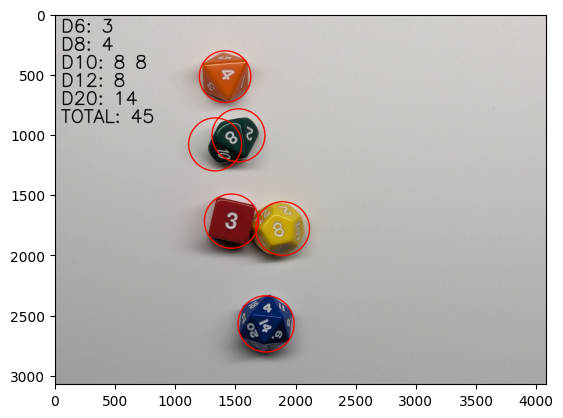

Images\Rolls\roll-d6d8d10d12d20 (2).jpg


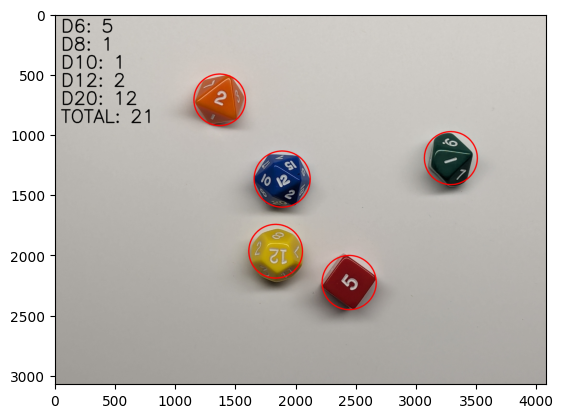

Images\Rolls\roll-d6d8d10d12d20 (3).jpg


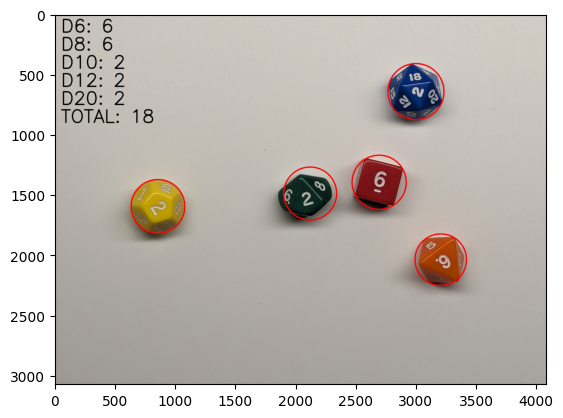

Images\Rolls\roll-d6d8d10d12d20 (4).jpg


KeyboardInterrupt: 

In [4]:



for roll in np.arange(1,16):
    roll_file = roll_template.replace("R#",str(roll))
    print(roll_file)
    image_roll_RGB = cv.rotate(cv.cvtColor(cv.imread(roll_file),cv.COLOR_BGR2RGB),cv.ROTATE_90_CLOCKWISE)
    results = dieset.get_die_faces_from_image(image_roll_RGB,confidence_threshold=0.5, log_level=LOG_LEVEL_INFO)
